In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Question 1) Please read the "sales.csv" file as a DataFrame object named as "sales_df". Print the length and the first 5 tuples of the DataFrame. (5 points)

In [2]:
#codes
sales_df = pd.read_csv("sales.csv")
sales_df = pd.DataFrame(sales_df)

a, b = sales_df.shape
print("Length of DataFrame:", a)
sales_df.head(5)

Length of DataFrame: 8523


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Question2) Split the dataset into the dependent (name it 'x') and independent variables (name it 'y') which are response variable( 'Item_Outlet_Sales') and predictors. Print their shape info and top 10 records of them. (5 points)

In [3]:
#codes
x = sales_df.iloc[:, 4]
y = sales_df.drop(sales_df.columns[4], axis = 1)

In [4]:
a = x.shape
print("Shape of DataFrame is:", a)
pd.DataFrame(x).head(10)
x

Shape of DataFrame is: (8523,)


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [5]:
a = y.shape
print("Shape of DataFrame is:", a)
pd.DataFrame(y).head(10)

Shape of DataFrame is: (8523, 45)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,0.000,0.127470,107.7622,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


Question3) Normalization step: Rescale dependent variables (x variable) into the range [0,1] by applying  MinMaxScaler to normalize. Lastly convert into dataframe (10 points)

In [6]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
#codes
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(x.reshape(-1,1))
pd.DataFrame(X_scaled)

,0
0,0.283587
1,0.031419
2,0.158115
3,0.053555
4,0.073651
...,...
8518,0.210293
8519,0.039529
8520,0.088850
8521,0.138835


Question 4) Split data into train and test sets. Use the split ratio as 80:20 and set the 'random_state' to an integer value. (10 points)

In [8]:
# Importing Train test split
from sklearn.model_selection import train_test_split

In [17]:
#codes
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

NameError: name 'train_test_split' is not defined

Question 5) Create an instance of kNN with a number of neighbors=3, then fit kNN regression model to train data. Finally, make prediction and calculate mean squared error (MSE). Print MSE value. (15 points)

In [14]:
#importing KNN regressor and metric mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [15]:
def euclidean_distance(a, b):
	return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))
 
def manhattan_distance(a, b):
	return sum(abs(e1-e2) for e1, e2 in zip(a,b))


In [16]:
#codes
model = KNN(n_neighbors=3)
model.fit(Y_train, X_train.reshape(-1,1)) #fit the model
pred=model.predict(Y_test) #make prediction on test set
error = mse(X_test,pred) #calculate mse
print('RMSE value for k= ' , 3 , 'is:', error)

NameError: name 'Y_train' is not defined

Question 6) Create Elbow function which does the same operation in the previous question for each k instance in the range [1-40] by using Manhattan and Euclidean distance metrics separately in order to determine the optimal value of k. (25 points)

In [13]:
#codes
K = 0
mse_val= []
dist_euclidean = []
dist_manhattan = []
def f():
    for K in range(40):
        K = K+1
        model = KNN(n_neighbors = K)

        model.fit(Y_train, X_train.reshape(-1,1))  #fit the model
        pred=model.predict(Y_test) #make prediction on test set
        error = mse(X_test,pred) #calculate mse
        mse_val.append(mse(X_test,pred))
        print('MSE value for k= ' , K , 'is:', mse_val[K-1])

Call the defined function for defined range of k

In [14]:
#codes
f()

MSE value for k=  1 is: 2342885.0406394447
MSE value for k=  2 is: 1884651.9593284933
MSE value for k=  3 is: 1707103.0208702437
MSE value for k=  4 is: 1609910.2290479993
MSE value for k=  5 is: 1551619.7290397594
MSE value for k=  6 is: 1499781.1091223916
MSE value for k=  7 is: 1485444.3506956103
MSE value for k=  8 is: 1497957.388623227
MSE value for k=  9 is: 1480388.3463001212
MSE value for k=  10 is: 1461221.6080375304
MSE value for k=  11 is: 1448891.8604790673
MSE value for k=  12 is: 1453852.8491953458
MSE value for k=  13 is: 1473597.784078485
MSE value for k=  14 is: 1494088.3914135254
MSE value for k=  15 is: 1500935.6535387856
MSE value for k=  16 is: 1514000.8410231543
MSE value for k=  17 is: 1524897.1023944614
MSE value for k=  18 is: 1533923.1037993056
MSE value for k=  19 is: 1544143.2061368208
MSE value for k=  20 is: 1561226.5549723285
MSE value for k=  21 is: 1580561.7777198763
MSE value for k=  22 is: 1600788.3732802174
MSE value for k=  23 is: 1615440.6523540376

Question 7) Visualize the test mean squared error (MSE) results of Manhattan and Euclidean distance metric by plotting. Two curves should be displayed in the same graph. (15 points)

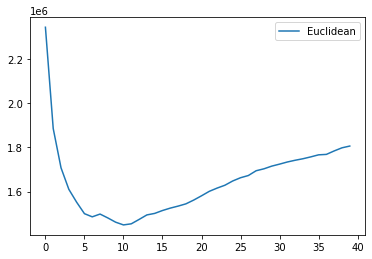

In [18]:
#codes
curve = pd.DataFrame(mse_val) #elbow curve 
plt.plot(curve, label = "Euclidean")
plt.legend()

<AxesSubplot:>

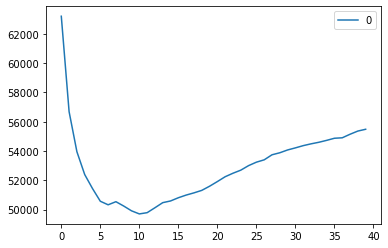

In [194]:
curve = pd.DataFrame(dist_euclidean) #elbow curve 
curve.plot()

In [18]:
curve = pd.DataFrame(dist_manhattan) #elbow curve 
curve.plot()

NameError: name 'dist_manhattan' is not defined

No handles with labels found to put in legend.


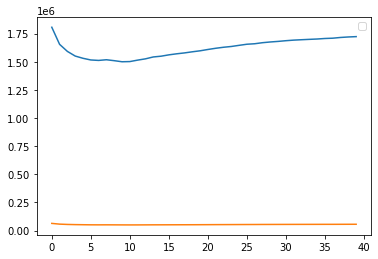

In [200]:
plt.plot(dist_manhattan)
plt.plot(dist_euclidean)
plt.legend()
plt.show()

In [182]:
def euclidean_distance(a, b):
	return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))
 
# define data
# calculate distance
dist = euclidean_distance(X_test, pred)
print(dist)

53950.07553825821


Question 8) According to obtained result, decide distance metric and optimal k value, and then use them for your kNN model, and make a prediction. Print MSE value for chosen k value. (15 points)

In [ ]:
#codes